# Analysis of Enriched Pharmacy Data

## Notebook Configurations

In [208]:
import pandas as pd
import plotly.express as px
import datetime as dt

In [209]:
pharmacies = pd.read_csv('enriched_pharmacy_data.csv')
pharmacies

,Pharmacy Name,License Number,License Type,License Status,Expiration Date,City,State,County,Zip,LAT,LONG,isGovernment,isSatellite,Facility Type,Specialties,Conditions,Registered Outsourcer,Accreditations,URL
0,986 INFUSION PHARMACY #1 INC,LSC 101414,Sterile Compounding Pharmacy,CLEAR,2025-07-01,ANAHEIM,CA,ORANGE,92807,33.848733,-117.788357,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,A & O SPECIALTY PHARMACY,LSC 101817,Sterile Compounding Pharmacy,CLEAR,2025-03-01,SALINAS,CA,MONTEREY,93901,36.636344,-121.623978,False,False,Sterile Compounding Pharmacy,"Hormone Replacement Therapy (HRT), Veterinary,...","Erectile Dysfunction, Thyroid Dysfunction",False,"PCCA, IACP, PCAB",https://www.aocompounding.com
2,ACCREDO HEALTH GROUP INC,NSC 101280,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-12-01,WARRENDALE,PA,NaN,15086,40.674947,-80.106364,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,ACCREDO HEALTH GROUP INC,NSC 101279,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-12-01,ORLANDO,FL,NaN,32822,28.489898,-81.290154,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,ADVANCE CARE PHARMACY,LSC 99611,Sterile Compounding Pharmacy,CLEAR,2025-07-01,ESCONDIDO,CA,SAN DIEGO,92025,33.102005,-117.080419,False,False,Sterile Compounding Pharmacy,"Hospice, Long Term Care, Pain Management, Anti...",Terminally Ill,False,NaN,https://www.advancecarepharmacy.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,WEST ANAHEIM MEDICAL CENTER,LSC 101464,Sterile Compounding Pharmacy,CLEAR,2025-11-01,ANAHEIM,CA,ORANGE,92804,33.818246,-117.974985,False,False,NaN,NaN,NaN,NaN,NaN,NaN
837,WHITE MEMORIAL MEDICAL CENTER DBA ADVENTIST HE...,LSC 100146,Sterile Compounding Pharmacy,CLEAR,2025-07-01,LOS ANGELES,CA,LOS ANGELES,90033,34.050380,-118.211991,False,False,NaN,NaN,NaN,NaN,NaN,NaN
838,WHITTIER HOSPITAL MEDICAL CENTER,LSC 101408,Sterile Compounding Pharmacy,CLEAR,2026-01-01,WHITTIER,CA,LOS ANGELES,90605,33.950295,-118.024352,False,False,NaN,NaN,NaN,NaN,NaN,NaN
839,"WOMENS INTERNATIONAL PHARMACY, INC. DBA BELMAR...",NSC 101754,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-03-01,YOUNGTOWN,AZ,NaN,85363,33.584969,-112.304916,False,False,Sterile Compounding Pharmacy,"Weight Loss, IV Vitamin Therapy, Hormone Repla...","Thyroid Disease, Menopause, Vaginitis",False,LegitScript,https://womensinternational.com


In [210]:
pharmacies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pharmacy Name          841 non-null    object 
 1   License Number         841 non-null    object 
 2   License Type           841 non-null    object 
 3   License Status         841 non-null    object 
 4   Expiration Date        841 non-null    object 
 5   City                   841 non-null    object 
 6   State                  841 non-null    object 
 7   County                 792 non-null    object 
 8   Zip                    841 non-null    int64  
 9   LAT                    828 non-null    float64
 10  LONG                   828 non-null    float64
 11  isGovernment           841 non-null    bool   
 12  isSatellite            841 non-null    bool   
 13  Facility Type          68 non-null     object 
 14  Specialties            59 non-null     object 
 15  Condit

## What Type of Facility is Being Licensed? 

### Facility Type

In [211]:
# Calculate the count of each facility type
facility_counts = pharmacies['Facility Type'].value_counts().reset_index()
facility_counts.columns = ['Facility Type', 'Count']

# Create the funnel chart
funnel_fig = px.funnel(facility_counts, x='Count', y='Facility Type', 
                       title="Distribution of Facility Types",
                       labels={'Count': 'Number of Facilities', 'Facility Type': 'Type of Facility'})
funnel_fig.show()

In [212]:
donut_fig = px.pie(facility_counts, names='Facility Type', values='Count', title='Distribution of Facility Types', hole = 0.25, labels = {'Facility Type': 'Type of Facility', 'Count' : 'Number of Facilities'}, template='simple_white')
donut_fig.show()

In [213]:
bar_fig = px.bar(
    facility_counts,
    x = 'Count',
    y = 'Facility Type',
    orientation = 'h',
    title = 'What Types of Facilities Hold Sterile Compounding Licenses in California?',
    labels = {'Facility Type': 'Type of Facility', 'Count' : 'Number of Facilities'},
    template = 'seaborn'
)

bar_fig.show()

### License Type

In [214]:
# Calculate the count of each facility type
license_counts = pharmacies['License Type'].value_counts().reset_index()
license_counts.columns = ['License Type', 'Count']

In [215]:
donut_fig = px.pie(license_counts, names='License Type', values='Count', title='Distribution of License Types', hole = 0.25, labels = {'License Type': 'Type of License', 'Count' : 'Number of Facilities'}, template='simple_white')
donut_fig.show()

## Geography: Exploring Where Licensed Pharmacies are Located

In [216]:
# Drop rows with null values in LAT and LONG
pharmacy_geo = pharmacies.dropna(subset=['LAT', 'LONG'])

# Create the map
map_fig = px.scatter_mapbox(pharmacy_geo, 
                            lat='LAT', 
                            lon='LONG', 
                            hover_name='Pharmacy Name',  
                            color='Facility Type',  
                            title="Where are the licensed pharmacies located? ",
                            zoom=6,  # Default zoom level
                            center={"lat": 36.7783, "lon": -119.4179},  # Center on California
                            height=600,  
                            template='simple_white')  

# Add mapbox token
map_fig.update_layout(mapbox_style="carto-positron") 

# Allow user interaction and zoom
map_fig.update_layout(mapbox=dict(zoom=6, center={"lat": 36.7783, "lon": -119.4179}))

# Show the map
map_fig.show()

In [217]:
pharmacy_geo = pharmacies.dropna(subset=['City', 'County'])
pharmacy_cities = pharmacy_geo.groupby(['City', 'Facility Type']).size().reset_index(name='Count').sort_values(by='Count')
pharmacy_counties = pharmacy_geo.groupby(['County', 'Facility Type']).size().reset_index(name='Count').sort_values(by='Count')

In [218]:
pharmacy_cities

,City,Facility Type,Count
0,ALHAMBRA,Sterile Compounding Pharmacy,1
1,BAKERSFIELD,Sterile Compounding Pharmacy,1
2,BERKELEY,Sterile Compounding Pharmacy,1
3,BISHOP,Sterile Compounding Pharmacy,1
4,CANOGA PARK,Sterile Compounding Pharmacy,1
5,CLOVIS,Sterile Compounding Pharmacy,1
6,COMMERCE,Sterile Compounding Pharmacy,1
7,COVINA,Sterile Compounding Pharmacy,1
8,ENCINO,Sterile Compounding Pharmacy,1
9,ESCONDIDO,Sterile Compounding Pharmacy,1


In [219]:
# Ensure the DataFrame is sorted by County
pharmacy_counties_sorted = pharmacy_counties.sort_values(by='County')

# Create the bubble chart
bubble_fig = px.scatter(pharmacy_counties_sorted, 
                        x='Facility Type', 
                        y='County', 
                        size='Count', 
                        color='Facility Type',
                        title="Facilities by County (Bubble Chart)",
                        labels={'Count': 'Number of Facilities', 'County': 'County'},
                        template='plotly_white',
                        category_orders={"County": pharmacy_counties_sorted['County'].unique()})  # Enforce alphabetical order

bubble_fig.show()

In [220]:
# Ensure the DataFrame is sorted by City
pharmacy_cities_sorted = pharmacy_cities.sort_values(by='City')

# Create the bubble chart for cities
city_bubble_fig = px.scatter(pharmacy_cities_sorted, 
                             x='Facility Type', 
                             y='City', 
                             size='Count', 
                             color='Facility Type',
                             title="Facilities by City (Bubble Chart)",
                             labels={'Count': 'Number of Facilities', 'City': 'City'},
                             template='plotly_white',
                             category_orders={"City": pharmacy_cities_sorted['City'].unique()})  # Enforce alphabetical order

city_bubble_fig.show()

## Exploring Expiration Dates

In [221]:
# Ensure the Expiration Date is in the correct datetime format
pharmacies['Expiration Date'] = pd.to_datetime(pharmacies['Expiration Date'], errors='coerce')

# Filter out rows with invalid Expiration Date
pharmacies_expiration = pharmacies[pharmacies['Expiration Date'].notna()]

# Extract year and month
pharmacies_expiration['Year'] = pharmacies_expiration['Expiration Date'].dt.year
pharmacies_expiration['Month'] = pharmacies_expiration['Expiration Date'].dt.month

# Filter out rows where the Year is 2024
pharmacies_expiration = pharmacies_expiration[pharmacies_expiration['Year'] != 2024]

# Group by Year and Month and count the number of expirations
expirations_by_year_month = pharmacies_expiration.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Filter out rows where the count of expirations is zero
expirations_by_year_month = expirations_by_year_month[expirations_by_year_month['Count'] > 0]

# Get unique years present in the data
available_years = expirations_by_year_month['Year'].unique()

# Create the heatmap of expirations by year and month
heatmap_fig = px.density_heatmap(expirations_by_year_month, 
                                 x='Month', 
                                 y='Year', 
                                 z='Count',  # Use 'Count' for the intensity
                                 title="Pharmacy Expirations Heatmap",
                                 labels={'Month': 'Month', 'Year': 'Year', 'Count': 'Number of Expirations'},
                                 nbinsx=12, nbinsy=5, 
                                 color_continuous_scale='Viridis')

# Ensure the Y-axis is treated as categorical and only shows available years
heatmap_fig.update_layout(
    yaxis=dict(
        tickmode='array',
        tickvals=available_years,  # Show only available years
        type='category'  # Make sure it's treated as a categorical axis
    )
)

heatmap_fig.show()


In [222]:
pharmacies_expiration

,Pharmacy Name,License Number,License Type,License Status,Expiration Date,City,State,County,Zip,LAT,...,isGovernment,isSatellite,Facility Type,Specialties,Conditions,Registered Outsourcer,Accreditations,URL,Year,Month
0,986 INFUSION PHARMACY #1 INC,LSC 101414,Sterile Compounding Pharmacy,CLEAR,2025-07-01,ANAHEIM,CA,ORANGE,92807,33.848733,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2025,7
1,A & O SPECIALTY PHARMACY,LSC 101817,Sterile Compounding Pharmacy,CLEAR,2025-03-01,SALINAS,CA,MONTEREY,93901,36.636344,...,False,False,Sterile Compounding Pharmacy,"Hormone Replacement Therapy (HRT), Veterinary,...","Erectile Dysfunction, Thyroid Dysfunction",False,"PCCA, IACP, PCAB",https://www.aocompounding.com,2025,3
2,ACCREDO HEALTH GROUP INC,NSC 101280,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-12-01,WARRENDALE,PA,NaN,15086,40.674947,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2025,12
3,ACCREDO HEALTH GROUP INC,NSC 101279,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-12-01,ORLANDO,FL,NaN,32822,28.489898,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2025,12
4,ADVANCE CARE PHARMACY,LSC 99611,Sterile Compounding Pharmacy,CLEAR,2025-07-01,ESCONDIDO,CA,SAN DIEGO,92025,33.102005,...,False,False,Sterile Compounding Pharmacy,"Hospice, Long Term Care, Pain Management, Anti...",Terminally Ill,False,NaN,https://www.advancecarepharmacy.com,2025,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,WEST ANAHEIM MEDICAL CENTER,LSC 101464,Sterile Compounding Pharmacy,CLEAR,2025-11-01,ANAHEIM,CA,ORANGE,92804,33.818246,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2025,11
837,WHITE MEMORIAL MEDICAL CENTER DBA ADVENTIST HE...,LSC 100146,Sterile Compounding Pharmacy,CLEAR,2025-07-01,LOS ANGELES,CA,LOS ANGELES,90033,34.050380,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2025,7
838,WHITTIER HOSPITAL MEDICAL CENTER,LSC 101408,Sterile Compounding Pharmacy,CLEAR,2026-01-01,WHITTIER,CA,LOS ANGELES,90605,33.950295,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2026,1
839,"WOMENS INTERNATIONAL PHARMACY, INC. DBA BELMAR...",NSC 101754,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-03-01,YOUNGTOWN,AZ,NaN,85363,33.584969,...,False,False,Sterile Compounding Pharmacy,"Weight Loss, IV Vitamin Therapy, Hormone Repla...","Thyroid Disease, Menopause, Vaginitis",False,LegitScript,https://womensinternational.com,2025,3


In [223]:
# Ensure the Expiration Date is in the correct datetime format
pharmacies['Expiration Date'] = pd.to_datetime(pharmacies['Expiration Date'], errors='coerce')

# Filter out rows with invalid Expiration Date
pharmacies_expiration = pharmacies[pharmacies['Expiration Date'].notna()]

# Extract year and month
pharmacies_expiration['Year'] = pharmacies_expiration['Expiration Date'].dt.year
pharmacies_expiration['Month'] = pharmacies_expiration['Expiration Date'].dt.month

# Filter out rows where the Year is 2024
pharmacies_expiration = pharmacies_expiration[pharmacies_expiration['Year'] != 2024]

# Group by Year and Month and count the number of expirations
expirations_by_year_month = pharmacies_expiration.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Filter out rows where the count of expirations is zero
expirations_by_year_month = expirations_by_year_month[expirations_by_year_month['Count'] > 0]

# Create a "Date" column combining Year and Month for the line plot
expirations_by_year_month['Date'] = pd.to_datetime(expirations_by_year_month[['Year', 'Month']].assign(DAY=1))

# Create the line chart of expirations over time
line_fig = px.line(expirations_by_year_month, 
                   x='Date', 
                   y='Count', 
                   title="Pharmacy Expirations Over Time",
                   labels={'Count': 'Number of Expirations', 'Date': 'Date'},
                   markers=True,  # Mark data points on the line
                   template='plotly_white')

line_fig.show()


In [224]:
# Ensure the Expiration Date is in the correct datetime format
pharmacies['Expiration Date'] = pd.to_datetime(pharmacies['Expiration Date'], errors='coerce')

# Filter out rows with invalid Expiration Date
pharmacies_expiration = pharmacies[pharmacies['Expiration Date'].notna()]

# Extract year, month, and facility type
pharmacies_expiration['Year'] = pharmacies_expiration['Expiration Date'].dt.year
pharmacies_expiration['Month'] = pharmacies_expiration['Expiration Date'].dt.month

# Filter out rows where the Year is 2024
pharmacies_expiration = pharmacies_expiration[pharmacies_expiration['Year'] != 2024]

# Group by Year, Month, and Facility Type and count the number of expirations
expirations_by_year_month_type = pharmacies_expiration.groupby(['Year', 'Month', 'Facility Type']).size().reset_index(name='Count')

# Filter out rows where the count of expirations is zero
expirations_by_year_month_type = expirations_by_year_month_type[expirations_by_year_month_type['Count'] > 0]

# Create a "Date" column combining Year and Month for the area chart
expirations_by_year_month_type['Date'] = pd.to_datetime(expirations_by_year_month_type[['Year', 'Month']].assign(DAY=1))

# Sort by 'Count' within each 'Date' so the smallest counts appear at the bottom
expirations_by_year_month_type = expirations_by_year_month_type.sort_values(by=['Date', 'Count'], ascending=[True, True])

# Create the stacked area chart of expirations over time by facility type
area_fig = px.area(expirations_by_year_month_type, 
                   x='Date', 
                   y='Count', 
                   color='Facility Type', 
                   title="Pharmacy Expirations Over Time by Facility Type",
                   labels={'Count': 'Number of Expirations', 'Date': 'Date'},
                   template='plotly_white',
                   markers=True)  # Add markers to show data points

# Show the plot
area_fig.show()


In [225]:
import plotly.graph_objects as go

# Ensure the Expiration Date is in the correct datetime format
pharmacies['Expiration Date'] = pd.to_datetime(pharmacies['Expiration Date'], errors='coerce')

# Filter out rows with invalid Expiration Date
pharmacies_expiration = pharmacies[pharmacies['Expiration Date'].notna()]

# Extract year, month, and facility type
pharmacies_expiration['Year'] = pharmacies_expiration['Expiration Date'].dt.year
pharmacies_expiration['Month'] = pharmacies_expiration['Expiration Date'].dt.month

# Filter out rows where the Year is 2024
pharmacies_expiration = pharmacies_expiration[pharmacies_expiration['Year'] != 2024]

# Group by Year, Month, and Facility Type and count the number of expirations
expirations_by_year_month_type = pharmacies_expiration.groupby(['Year', 'Month', 'Facility Type']).size().reset_index(name='Count')

# Filter out rows where the count of expirations is zero
expirations_by_year_month_type = expirations_by_year_month_type[expirations_by_year_month_type['Count'] > 0]

# Create a "Date" column combining Year and Month for the plot
expirations_by_year_month_type['Date'] = pd.to_datetime(expirations_by_year_month_type[['Year', 'Month']].assign(DAY=1))

# Calculate total expirations per month (sum across all facility types)
total_expirations_by_month = expirations_by_year_month_type.groupby('Date')['Count'].sum().reset_index(name='Total Expirations')

# Create a bar chart for expirations by Facility Type and Month
bar_fig = go.Figure()

# Add bars for each Facility Type
for facility_type in expirations_by_year_month_type['Facility Type'].unique():
    df_facility = expirations_by_year_month_type[expirations_by_year_month_type['Facility Type'] == facility_type]
    bar_fig.add_trace(go.Bar(x=df_facility['Date'], 
                             y=df_facility['Count'], 
                             name=facility_type, 
                             marker=dict(color=px.colors.qualitative.Set1[len(bar_fig.data) % len(px.colors.qualitative.Set1)])))

# Add a line for the total expirations
bar_fig.add_trace(go.Scatter(x=total_expirations_by_month['Date'], 
                             y=total_expirations_by_month['Total Expirations'], 
                             mode='lines+markers', 
                             name='Total Expirations', 
                             line=dict(color='black', width=3)))

# Update layout for better visualization
bar_fig.update_layout(
    title="Pharmacy Expirations by Facility Type with Total Expirations",
    xaxis_title="Date",
    yaxis_title="Number of Expirations",
    template="plotly_white",
    barmode="stack",  # Stack bars for each month by facility type
    xaxis=dict(tickformat="%b %Y"),
    height=600
)

bar_fig.show()


In [226]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Ensure the Expiration Date is in the correct datetime format
pharmacies['Expiration Date'] = pd.to_datetime(pharmacies['Expiration Date'], errors='coerce')

# Filter out rows with invalid Expiration Date
pharmacies_expiration = pharmacies[pharmacies['Expiration Date'].notna()]

# Extract year, month, and facility type
pharmacies_expiration['Year'] = pharmacies_expiration['Expiration Date'].dt.year
pharmacies_expiration['Month'] = pharmacies_expiration['Expiration Date'].dt.month

# Filter out rows where the Year is 2024
pharmacies_expiration = pharmacies_expiration[pharmacies_expiration['Year'] != 2024]

# Group by Year, Month, and Facility Type and count the number of expirations
expirations_by_year_month_type = pharmacies_expiration.groupby(['Year', 'Month', 'Facility Type']).size().reset_index(name='Count')

# Filter out rows where the count of expirations is zero
expirations_by_year_month_type = expirations_by_year_month_type[expirations_by_year_month_type['Count'] > 0]

# Create a "Date" column combining Year and Month for the plot
expirations_by_year_month_type['Date'] = pd.to_datetime(expirations_by_year_month_type[['Year', 'Month']].assign(DAY=1))

# Calculate total expirations per month (sum across all facility types)
total_expirations_by_month = expirations_by_year_month_type.groupby('Date')['Count'].sum().reset_index(name='Total Expirations')

# Create a bar chart for expirations by Facility Type and Month
bar_fig = go.Figure()

# Add bars for each Facility Type
for facility_type in expirations_by_year_month_type['Facility Type'].unique():
    df_facility = expirations_by_year_month_type[expirations_by_year_month_type['Facility Type'] == facility_type]
    bar_fig.add_trace(go.Bar(x=df_facility['Date'], 
                             y=df_facility['Count'], 
                             name=facility_type, 
                             marker=dict(color=px.colors.qualitative.Set1[len(bar_fig.data) % len(px.colors.qualitative.Set1)])))

# Add a line for the total expirations
bar_fig.add_trace(go.Scatter(x=total_expirations_by_month['Date'], 
                             y=total_expirations_by_month['Total Expirations'], 
                             mode='lines+markers', 
                             name='Total Expirations', 
                             line=dict(color='black', width=3)))

# Update layout for better visualization
bar_fig.update_layout(
    title="Pharmacy Expirations by Facility Type with Total Expirations",
    xaxis_title="Date",
    yaxis_title="Number of Expirations",
    template="plotly_white",
    barmode="group",  # Group bars side by side
    xaxis=dict(tickformat="%b %Y"),
    height=600
)

bar_fig.show()


## Specialties 

In [227]:
# Create pharmacies_specialties where Specialties is not null
pharmacies_specialties = pharmacies.copy()
pharmacies_specialties = pharmacies_specialties[pharmacies_specialties['Specialties'].notna()]

# Ensure the Specialties column is a list (if not already)
pharmacies_specialties['Specialties'] = pharmacies_specialties['Specialties'].apply(lambda x: x.split(',') if isinstance(x, str) else x)


In [228]:
# Assuming your dataframe is named pharmacies
# Exploding the list of specialties to individual rows
specialties = pharmacies.explode('Specialties')

# Counting the occurrences of each specialty
specialty_counts = specialties['Specialties'].value_counts().reset_index()
specialty_counts.columns = ['Specialty', 'Count']

# Creating the bar plot
fig = px.bar(specialty_counts, x='Specialty', y='Count', title="Specialty Frequency", 
             labels={'Specialty': 'Pharmacy Specialties', 'Count': 'Number of Pharmacies'})
fig.show()

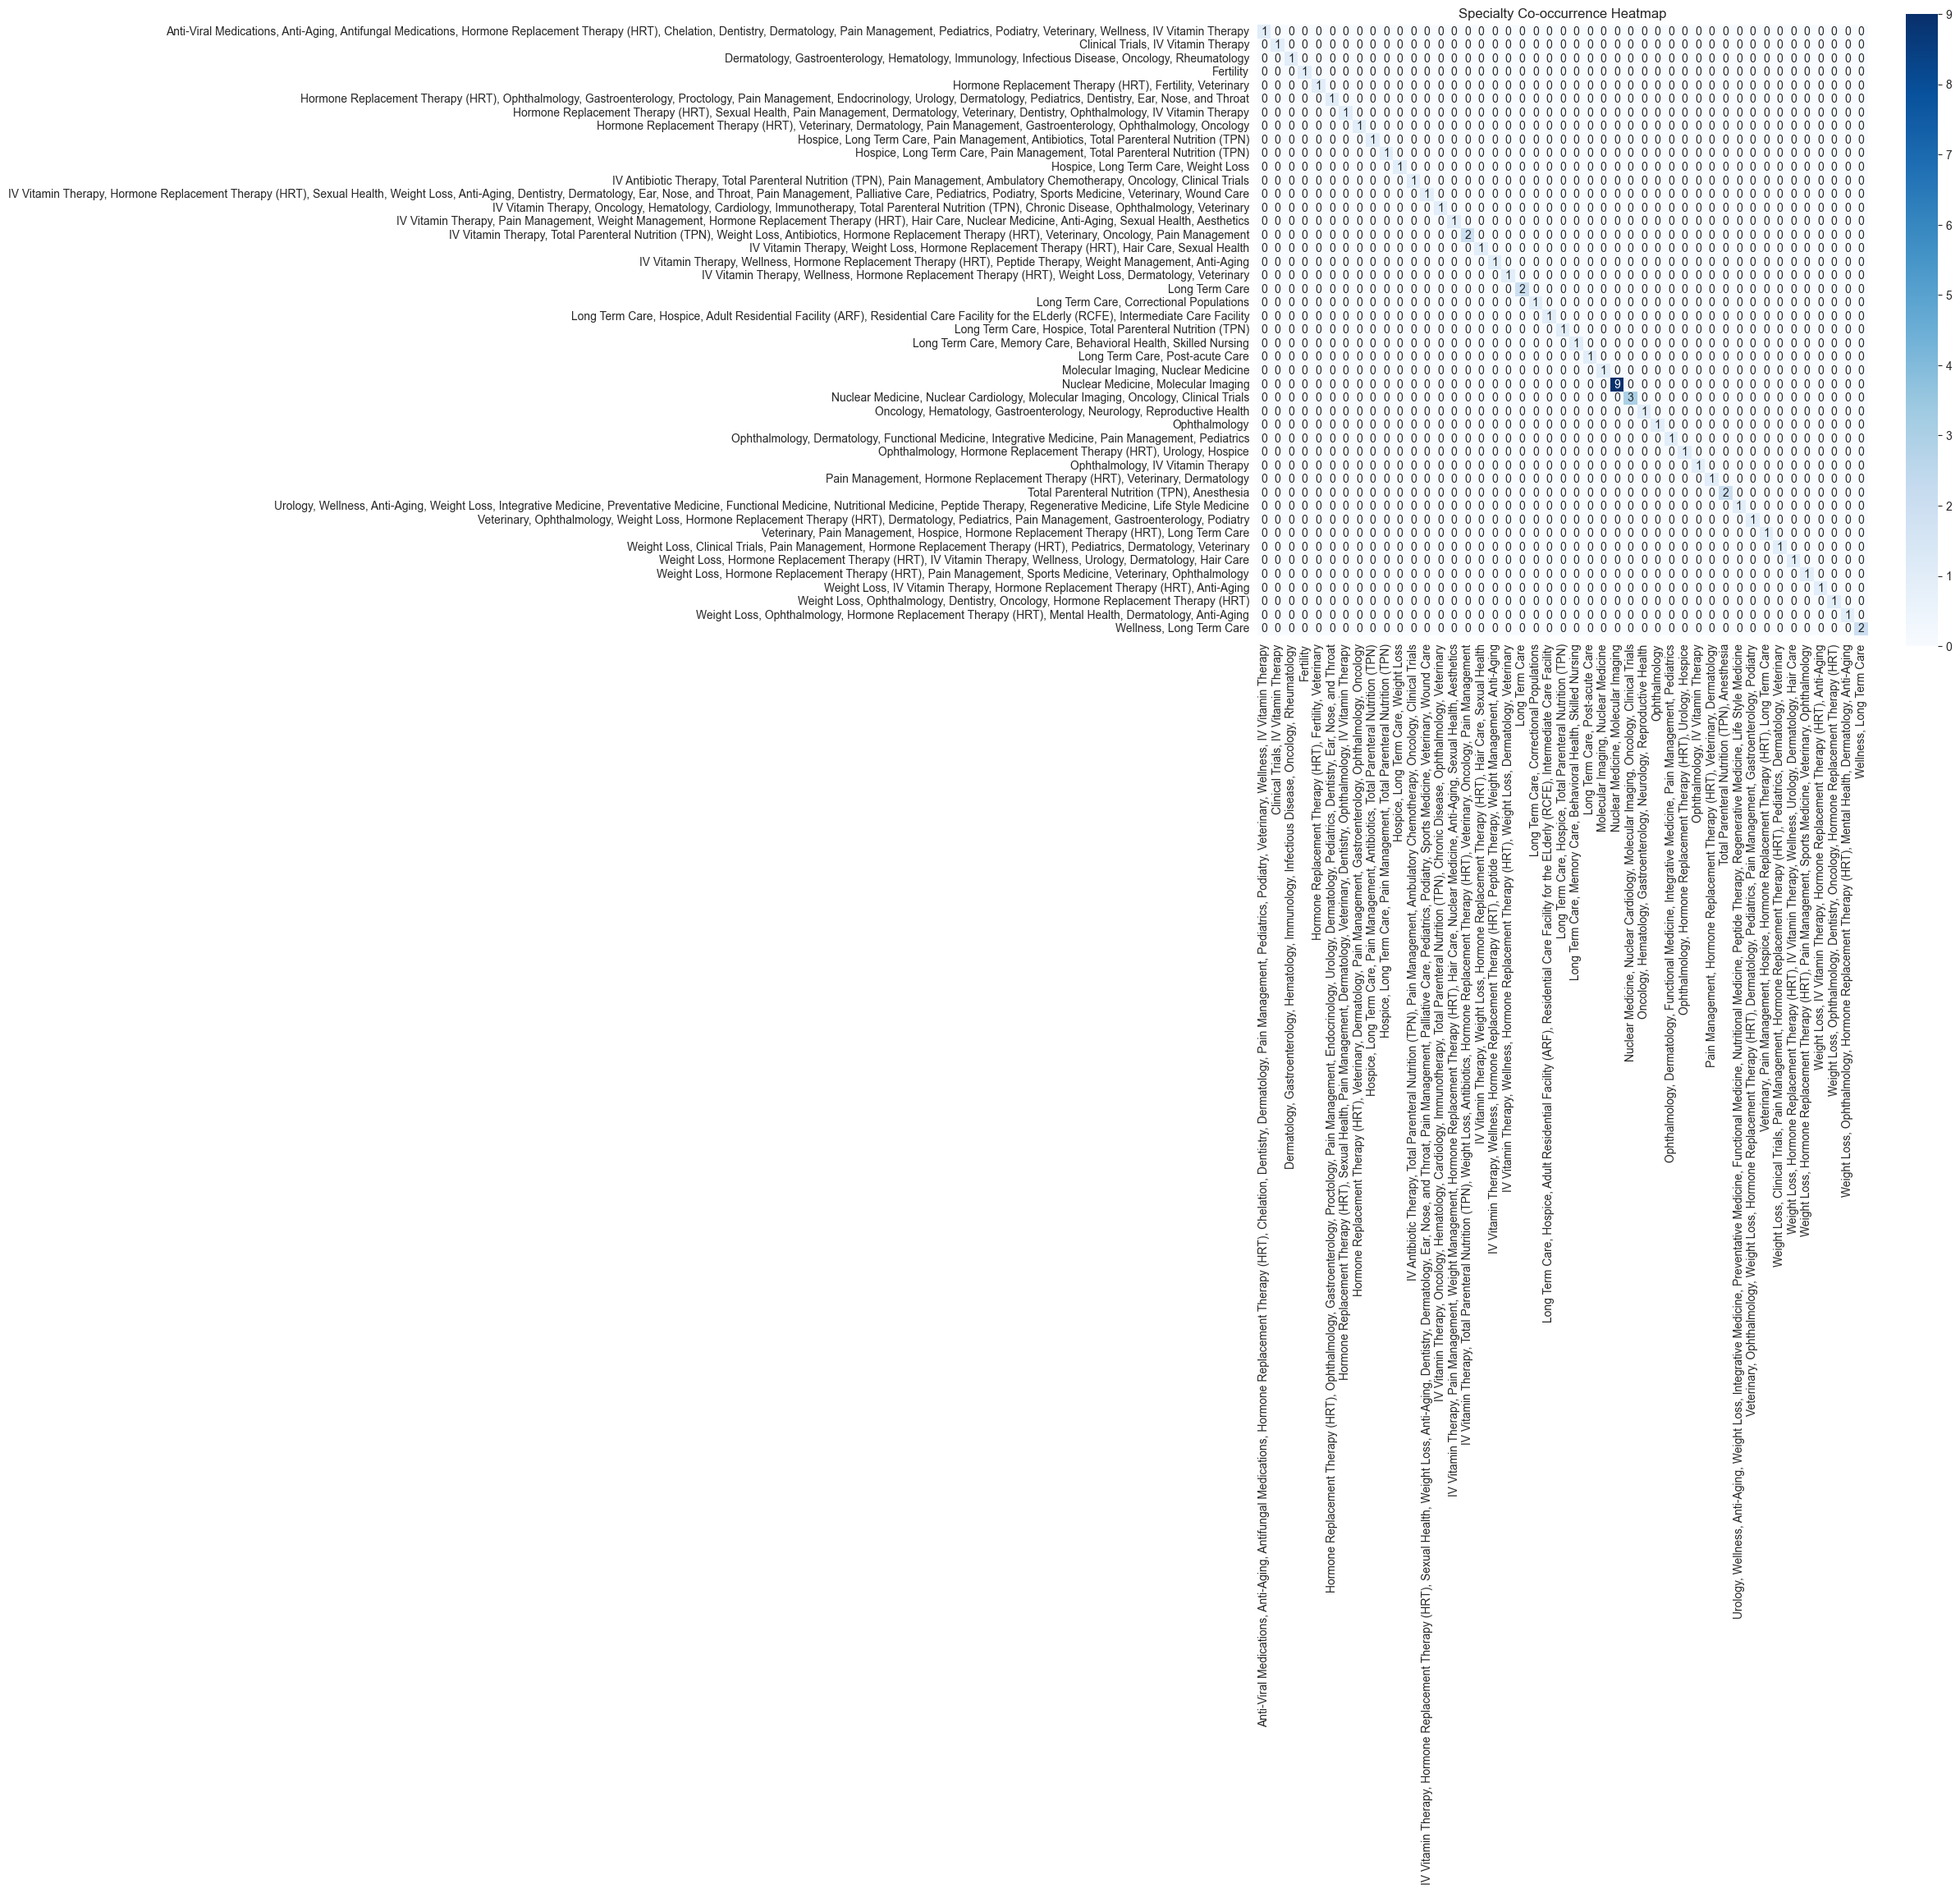

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named pharmacies

# Step 1: Explode the 'Specialties' column so that each pharmacy-specialty pair becomes a separate row
exploded_specialties = pharmacies.explode('Specialties')

# Step 2: Create a one-hot encoded DataFrame of specialties per pharmacy
specialty_matrix = pd.get_dummies(exploded_specialties['Specialties'])

# Step 3: Aggregate the data by summing the one-hot encoded values
# This creates a matrix where each row is a pharmacy and each column is a specialty
specialty_matrix = specialty_matrix.groupby(exploded_specialties.index).sum()

# Step 4: Calculate co-occurrence matrix by multiplying the specialty matrix with its transpose
co_occurrence_matrix = specialty_matrix.T.dot(specialty_matrix)

# Step 5: Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, cmap='Blues', annot=True, fmt='d', square=True)
plt.title('Specialty Co-occurrence Heatmap')
plt.show()


In [230]:
# Drop rows with NA values in the 'Specialties' column
pharmacies_clean = pharmacies.copy()
pharmacies_clean = pharmacies_clean.dropna(subset='Specialties')
pharmacies_clean

,Pharmacy Name,License Number,License Type,License Status,Expiration Date,City,State,County,Zip,LAT,LONG,isGovernment,isSatellite,Facility Type,Specialties,Conditions,Registered Outsourcer,Accreditations,URL
1,A & O SPECIALTY PHARMACY,LSC 101817,Sterile Compounding Pharmacy,CLEAR,2025-03-01,SALINAS,CA,MONTEREY,93901,36.636344,-121.623978,False,False,Sterile Compounding Pharmacy,"Hormone Replacement Therapy (HRT), Veterinary,...","Erectile Dysfunction, Thyroid Dysfunction",False,"PCCA, IACP, PCAB",https://www.aocompounding.com
4,ADVANCE CARE PHARMACY,LSC 99611,Sterile Compounding Pharmacy,CLEAR,2025-07-01,ESCONDIDO,CA,SAN DIEGO,92025,33.102005,-117.080419,False,False,Sterile Compounding Pharmacy,"Hospice, Long Term Care, Pain Management, Anti...",Terminally Ill,False,NaN,https://www.advancecarepharmacy.com
37,AMBROSIA HEALTHCARE INC,LSC 99935,Sterile Compounding Pharmacy,CLEAR,2025-06-01,PALM DESERT,CA,RIVERSIDE,92211,33.765401,-116.334205,False,False,Sterile Compounding Pharmacy,"Veterinary, Pain Management, Hospice, Hormone ...",NaN,False,IACP,https://www.ambrosiahc.com
61,BOOTHWYN PHARMACY LLC,NSC 101082,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-07-01,KENNETT SQUARE,PA,NaN,19348,39.870280,-75.712913,False,False,Sterile Compounding Pharmacy,"Veterinary, Ophthalmology, Weight Loss, Hormon...","Infertility, Glaucoma, Dry Eye Syndrome, Acne,...",False,"PCAB, ACHC, LegitScript",https://boothwyn.com
83,CD PHARMACY LLC DBA RED ROCK PHARMACY,NSC 101839,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-03-01,ST. GEORGE,UT,NaN,84790,37.044186,-113.577299,False,False,Sterile Compounding Pharmacy,"Hospice, Long Term Care, Weight Loss",NaN,False,NaN,https://www.redrockrx.com
95,CENTRAL ADMIXTURE PHARMACY SERVICES INC,LSC 99040,Sterile Compounding Pharmacy,CLEAR,2025-09-01,FREMONT,CA,ALAMEDA,94538,37.501368,-121.956753,False,False,Sterile Compounding Pharmacy,"Total Parenteral Nutrition (TPN), Anesthesia",Cardioplegia,True,NaN,https://www.capspharmacy.com/en.html
96,CENTRAL ADMIXTURE PHARMACY SERVICES INC,LSC 101206,Sterile Compounding Pharmacy,CLEAR,2025-10-01,SANTA FE SPRINGS,CA,LOS ANGELES,90670,33.933565,-118.062611,False,False,Sterile Compounding Pharmacy,"Total Parenteral Nutrition (TPN), Anesthesia",Cardioplegia,True,NaN,https://www.capspharmacy.com/en.html
100,CHEMIQUE PHARMACEUTICALS INC,LSC 99028,Sterile Compounding Pharmacy,CLEAR,2025-12-01,POMONA,CA,LOS ANGELES,91768,34.063516,-117.790379,False,False,Sterile Compounding Pharmacy,"IV Vitamin Therapy, Total Parenteral Nutrition...","Anemia, Nausea, Diabetes, Hypertension",False,American Association of Homeopathic Pharmacist...,https://chemiquepharm.com
101,CHEMIQUE PHARMACEUTICALS INC,LSC 99027,Sterile Compounding Pharmacy,CLEAR,2025-06-01,WHITTIER,CA,LOS ANGELES,90602,33.972782,-118.022066,False,False,Sterile Compounding Pharmacy,"IV Vitamin Therapy, Total Parenteral Nutrition...","Anemia, Nausea, Diabetes, Hypertension",False,American Association of Homeopathic Pharmacist...,https://chemiquepharm.com
119,CITRUS PHARMACY,LSC 99560,Sterile Compounding Pharmacy,CLEAR,2025-07-01,REDLANDS,CA,SAN BERNARDINO,92373,34.011953,-117.159699,False,False,Sterile Compounding Pharmacy,Long Term Care,NaN,False,NaN,https://citrusrx.com


In [231]:
# Split each string by commas and strip any extra whitespace
exploded_specialties = pharmacies_clean['Specialties'].str.split(',').explode()

# Remove leading/trailing spaces from each specialty
exploded_specialties = exploded_specialties.str.strip()

# Get unique specialties
unique_specialties = exploded_specialties.unique()

# Display the unique specialties
unique_specialties


array(['Hormone Replacement Therapy (HRT)', 'Veterinary', 'Dermatology',
       'Pain Management', 'Gastroenterology', 'Ophthalmology', 'Oncology',
       'Hospice', 'Long Term Care', 'Antibiotics',
       'Total Parenteral Nutrition (TPN)', 'Weight Loss', 'Pediatrics',
       'Podiatry', 'Anesthesia', 'IV Vitamin Therapy',
       'Weight Management', 'Hair Care', 'Nuclear Medicine', 'Anti-Aging',
       'Sexual Health', 'Aesthetics', 'Hematology', 'Cardiology',
       'Immunotherapy', 'Chronic Disease', 'Correctional Populations',
       'Dentistry', 'Ear', 'Nose', 'and Throat', 'Palliative Care',
       'Sports Medicine', 'Wound Care',
       'Adult Residential Facility (ARF)',
       'Residential Care Facility for the ELderly (RCFE)',
       'Intermediate Care Facility', 'Clinical Trials',
       'Molecular Imaging', 'Nuclear Cardiology',
       'Anti-Viral Medications', 'Antifungal Medications', 'Chelation',
       'Wellness', 'Fertility', 'IV Antibiotic Therapy',
       'Ambulator

In [232]:
import re

In [233]:
# Drop rows where 'Specialties' column is either NaN or an empty string
pharmacies_clean = pharmacies_clean[pharmacies_clean['Specialties'].notna()]
pharmacies_clean = pharmacies_clean[pharmacies_clean['Specialties'] != '']

# Alternatively, you can combine both conditions into one filter:
# pharmacies_clean = pharmacies_clean[~pharmacies_clean['Specialties'].isin([None, ''])]

# Now continue with your code
pharmacies_clean['Specialties'] = pharmacies_clean['Specialties'].str.replace('Ear, Nose, and Throat', 'Ear Nose and Throat', regex=False)

# Fix camel case, split combined specialties like 'PainManagementGastroenterology' into 'Pain Management' and 'Gastroenterology'
pharmacies_clean['Specialties'] = pharmacies_clean['Specialties'].apply(
    lambda x: re.sub(r'([a-z])([A-Z])', r'\1 \2', x) if isinstance(x, str) else x
)


# Split and process the specialties as before
exploded_specialties = pharmacies_clean['Specialties'].str.split(',').explode()

# Remove leading/trailing spaces from each specialty
exploded_specialties = exploded_specialties.str.strip()

# Count how many times each specialty appears (i.e., how many pharmacies have that specialty)
specialty_counts = exploded_specialties.value_counts()

# Display the unique specialties with their counts
specialty_counts


Specialties
Hormone Replacement Therapy (HRT)    22
Pain Management                      17
Veterinary                           14
IV Vitamin Therapy                   14
Weight Loss                          14
                                     ..
Post-acute Care                       1
Memory Care                           1
Behavioral Health                     1
Skilled Nursing                       1
Mental Health                         1
Name: count, Length: 65, dtype: int64

In [234]:
specialty_counts

Specialties
Hormone Replacement Therapy (HRT)    22
Pain Management                      17
Veterinary                           14
IV Vitamin Therapy                   14
Weight Loss                          14
                                     ..
Post-acute Care                       1
Memory Care                           1
Behavioral Health                     1
Skilled Nursing                       1
Mental Health                         1
Name: count, Length: 65, dtype: int64

In [235]:
import plotly.express as px

# Ensure specialty counts are sorted by count in descending order
specialty_counts_sorted = specialty_counts.sort_values(ascending=False)

# Plot for Specialty Counts (sorted)
specialty_chart = px.bar(
    x=specialty_counts_sorted.values,
    y=specialty_counts_sorted.index,
    orientation='h',
    labels={'x': 'Count', 'y': 'Specialty'},
    title="Specialty Counts",
    color=specialty_counts_sorted.values,  # Adding color based on the count for more clarity
    color_continuous_scale='Viridis'  # A visually appealing color scale
)

# Reversing the y-axis to have the largest values on top
specialty_chart.update_layout(
    template="simple_white",  # Simple white background
    yaxis={'categoryorder': 'total ascending'},  # Sorting values in descending order
    xaxis_title="Count",
    yaxis_title="Specialty",
    margin={"l": 150, "r": 200},  # Increase both left and right margin for better label space
    height=1200,  # Increase height to give more room for the labels
    yaxis_tickangle=0  # Horizontal labels
)

# Ensure condition counts are sorted by count in descending order
condition_counts_sorted = condition_counts.sort_values(ascending=False)


# Plot for Condition Counts (sorted)
condition_chart = px.bar(
    x=condition_counts_sorted.values,
    y=condition_counts_sorted.index,
    orientation='h',
    labels={'x': 'Count', 'y': 'Condition'},
    title="Condition Counts",
    color=condition_counts_sorted.values,  # Adding color based on the count for more clarity
    color_continuous_scale='Viridis'  # A visually appealing color scale
)

# Reversing the y-axis to have the largest values on top
condition_chart.update_layout(
    template="simple_white",  # Simple white background
    yaxis={'categoryorder': 'total ascending'},  # Sorting values in descending order
    xaxis_title="Count",
    yaxis_title="Condition",
    margin={"l": 150, "r": 200},  # Increase both left and right margin for better label space
    height=1200,  # Increase height to give more room for the labels
    width=1200,  # Increase width for more space for labels
    yaxis_tickangle=0,  # Horizontal labels
    font=dict(size=10),  # Decrease font size for labels
)
# Show the charts
specialty_chart.show()
condition_chart.show()


In [236]:
pharmacies.head()


,Pharmacy Name,License Number,License Type,License Status,Expiration Date,City,State,County,Zip,LAT,LONG,isGovernment,isSatellite,Facility Type,Specialties,Conditions,Registered Outsourcer,Accreditations,URL
0,986 INFUSION PHARMACY #1 INC,LSC 101414,Sterile Compounding Pharmacy,CLEAR,2025-07-01,ANAHEIM,CA,ORANGE,92807,33.848733,-117.788357,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,A & O SPECIALTY PHARMACY,LSC 101817,Sterile Compounding Pharmacy,CLEAR,2025-03-01,SALINAS,CA,MONTEREY,93901,36.636344,-121.623978,False,False,Sterile Compounding Pharmacy,"Hormone Replacement Therapy (HRT), Veterinary,...","Erectile Dysfunction, Thyroid Dysfunction",False,"PCCA, IACP, PCAB",https://www.aocompounding.com
2,ACCREDO HEALTH GROUP INC,NSC 101280,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-12-01,WARRENDALE,PA,NaN,15086,40.674947,-80.106364,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,ACCREDO HEALTH GROUP INC,NSC 101279,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-12-01,ORLANDO,FL,NaN,32822,28.489898,-81.290154,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,ADVANCE CARE PHARMACY,LSC 99611,Sterile Compounding Pharmacy,CLEAR,2025-07-01,ESCONDIDO,CA,SAN DIEGO,92025,33.102005,-117.080419,False,False,Sterile Compounding Pharmacy,"Hospice, Long Term Care, Pain Management, Anti...",Terminally Ill,False,NaN,https://www.advancecarepharmacy.com


In [239]:
from collections import Counter


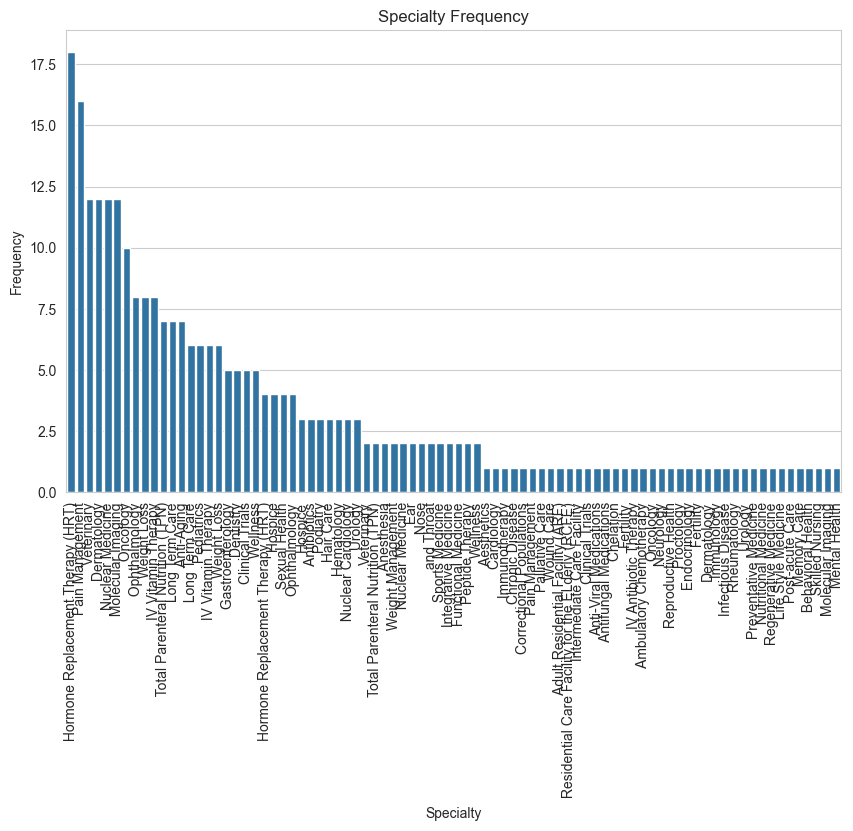

ValueError: Unknown format code 'd' for object of type 'float'

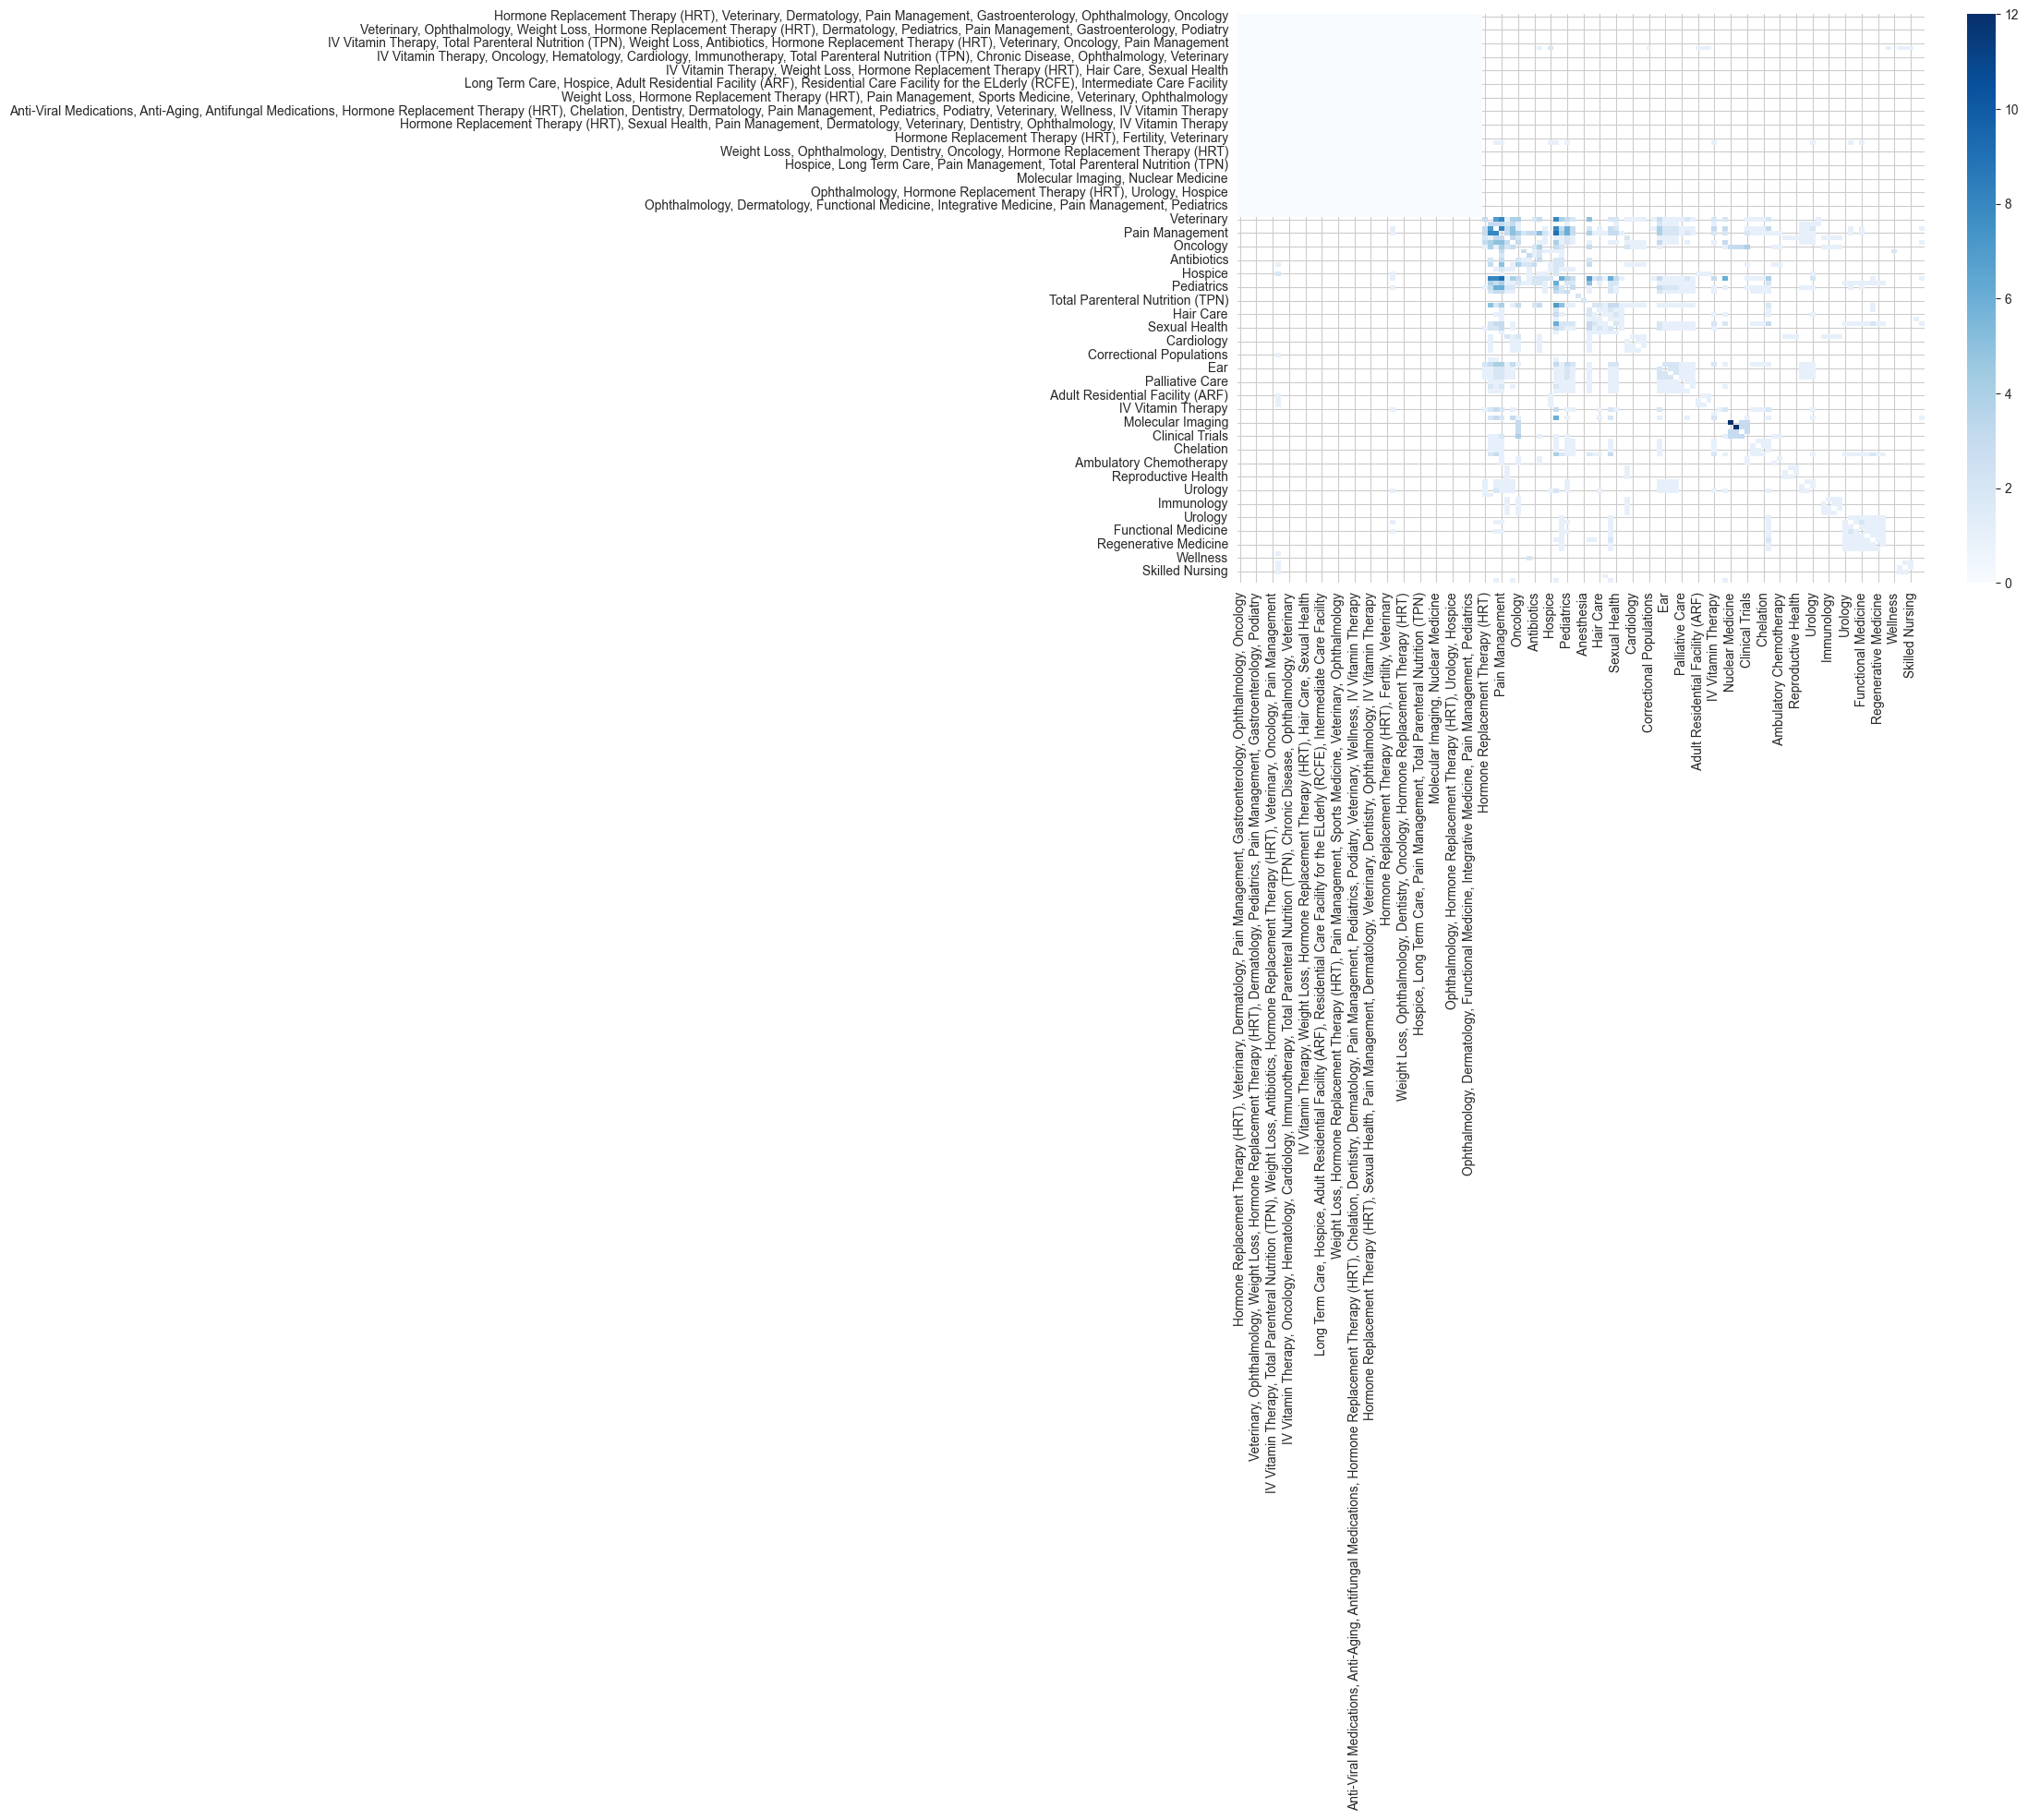

In [240]:
df = pharmacies.copy()
# Remove rows with NaN in "Specialties"
df_cleaned = df.dropna(subset=["Specialties"])

# Extract unique specialties
specialties = df_cleaned["Specialties"].unique()

# Split specialties into lists and flatten the list for co-occurrence analysis
specialties_list = [spec.split(",") for spec in df_cleaned["Specialties"]]
flat_specialties = [spec for sublist in specialties_list for spec in sublist]

# Count frequency of each specialty
specialty_counts = Counter(flat_specialties)

# Create a co-occurrence matrix for specialties
co_occurrence = Counter()
for specialty_set in specialties_list:
    for pair in combinations(specialty_set, 2):
        co_occurrence[tuple(sorted(pair))] += 1

# Convert co-occurrence to a DataFrame for easy plotting
co_occurrence_df = pd.DataFrame.from_dict(co_occurrence, orient="index", columns=["Co-occurrence"])
co_occurrence_df.index = [f"{pair[0]} & {pair[1]}" for pair in co_occurrence_df.index]

# Visualizations
# Plot specialty frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=[item[0] for item in specialty_counts.most_common()], y=[item[1] for item in specialty_counts.most_common()])
plt.title("Specialty Frequency")
plt.xticks(rotation=90)
plt.xlabel("Specialty")
plt.ylabel("Frequency")
plt.show()

# Heatmap for co-occurrence
co_occurrence_matrix = pd.DataFrame(0, index=specialties, columns=specialties)
for (s1, s2), count in co_occurrence.items():
    co_occurrence_matrix.loc[s1, s2] = count
    co_occurrence_matrix.loc[s2, s1] = count

plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Specialty Co-occurrence Heatmap")
plt.show()